# DNA Sequence Classification

## DNA Sequencing:
A laboratory technique used to determine the exact sequence of bases (A, C, G, and T) in a DNA molecule.

## Gene:
A set of instructions that determine what the organism is like, its appearance, how it survives, and how it behaves in its environment.\
A gene consists of a long combination of four different nucleotide bases, or chemicals. There are many possible combinations.\
The four nucleotides are:
* A (adenine)
* C (cytosine)
* G (guanine)
* T (thymine)\
Note: Different combinations of the letters ACGT give people different characteristics.

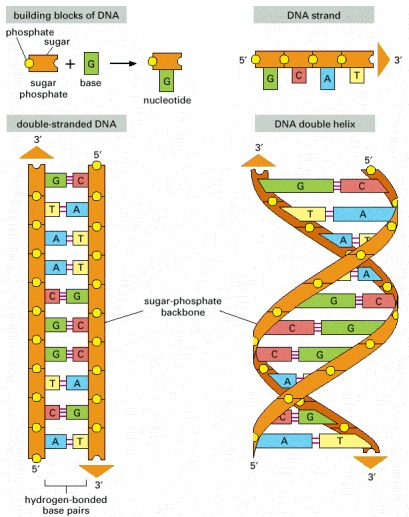

In [4]:
!pip install --quiet Bio # to work with fasta sequences

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
for sequence in SeqIO.parse('../Data/example_dna.fa', "fasta"):
    print("Id: ", sequence.id)
    print("Seq: ", sequence.seq)
    print("Length: ", len(sequence))
    print()

Id:  ENST00000435737.5
Seq:  ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
Length:  390

Id:  ENST00000419127.5
Seq:  ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACC

In [7]:
# a function to convert sequences into k-mer 
def kmer_count(seq, size=6):
    return [seq[x: x+size].lower() for x in
            range(len(seq) - size+1)]

In [8]:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
print(kmer_count(mySeq, size=7))

['gtgccca', 'tgcccag', 'gcccagg', 'cccaggt', 'ccaggtt', 'caggttc', 'aggttca', 'ggttcag', 'gttcagt', 'ttcagtg', 'tcagtga', 'cagtgag', 'agtgagt', 'gtgagtg', 'tgagtga', 'gagtgac', 'agtgaca', 'gtgacac', 'tgacaca', 'gacacag', 'acacagg', 'cacaggc', 'acaggca', 'caggcag']


It returns a list of k-mer “words.” You can then join the “words” into a “sentence”, then apply your favorite natural language processing methods on the “sentences” as you normally would.

In [9]:
words = kmer_count(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

In [10]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(kmer_count(mySeq1, size=6))
sentence2 = ' '.join(kmer_count(mySeq2, size=6))
print(sentence1, "\n")
print(sentence2)

tctcac ctcaca tcacac cacaca acacat cacatg acatgt catgtg atgtgc tgtgcc gtgcca tgccaa gccaat ccaatc caatca aatcac atcact tcactg cactgt actgtc ctgtca tgtcac gtcacc tcaccc 

gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag


In [11]:
# Create a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
print(X)

[[0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1
  1 0 0 0 1 0 1 1 0 1 0 0 1]
 [1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0
  0 1 1 1 0 1 0 0 1 0 1 1 0]
 [0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1
  1 0 0 0 1 0 1 1 0 1 0 0 1]]


## Load Data
* Human DNA
* Dog DNA
* Chimpanzee DNA

In [5]:
# Load data

human_dna = pd.read_table('../Data/human.txt')
chimp_dna = pd.read_table('../Data/chimpanzee.txt')
dog_dna = pd.read_table('../Data/dog.txt')

In [13]:
# Display 2 random samples of each dataset

print("Human DNA")
print(human_dna.sample(2), "\n")
print("Dog DNA")
print(dog_dna.sample(2), "\n")
print("Chimpanzee DNA")
print(chimp_dna.sample(2))

Human DNA
                                               sequence  class
2931  ATGAGCACAGTGGAAGAGGATTCTGACACAGTAACAGTAGAAACTG...      6
1323  ATGGCGGCACCGCTGCTTCACACGCGTTTGCCGGGAGATGCGGCCG...      6 

Dog DNA
                                              sequence  class
374  ATGAGCGGGGAGGGCGGCGGCGGCGGCGGCGGCGGGGGGCGCCGCA...      4
305  ATGGACGACAATATGGACACAAAATCCATTCTAGAAGAACTTCTTC...      1 

Chimpanzee DNA
                                               sequence  class
1162  ATGTACACCTTTGATCAGGCCACAGGTGGGACTGCGCAATTTGAAG...      3
1498  ATGTGGAGAGACAGCTATTATTTTAGTGGATTAGGTCTCTATTCTC...      1


In [14]:
# No. of null values in dataset

print("Null count in each dataset")

print("Dog DNA: ", dog_dna.isnull().sum(), "\n")
print("Human DNA: ", human_dna.isnull().sum(), "\n")
print("Chimpanzee DNA: ", chimp_dna.isnull().sum(), "\n")

Null count in each dataset
Dog DNA:  sequence    0
class       0
dtype: int64 

Human DNA:  sequence    0
class       0
dtype: int64 

Chimpanzee DNA:  sequence    0
class       0
dtype: int64 



In [15]:
# No. of duplicates in each dataset

print("No. of duplicates in each dataset")

print("Dog DNA: ", dog_dna.duplicated().sum(), "\n")
print("Human DNA: ", human_dna.duplicated().sum(), "\n")
print("Chimpanzee DNA: ", chimp_dna.duplicated().sum(), "\n")

No. of duplicates in each dataset
Dog DNA:  3 

Human DNA:  751 

Chimpanzee DNA:  7 



In [16]:
# Shape before dropping duplicates

print("Shape before dropping duplicates")
print("Dog DNA: ", dog_dna.shape)
print("Human DNA: ", human_dna.shape)
print("Chimpanzee DNA: ", chimp_dna.shape)

Shape before dropping duplicates
Dog DNA:  (820, 2)
Human DNA:  (4380, 2)
Chimpanzee DNA:  (1682, 2)


In [17]:
# drop all duplicates

dog_dna.drop_duplicates(inplace=True)
human_dna.drop_duplicates(inplace=True)
chimp_dna.drop_duplicates(inplace=True)

In [18]:
# Shape after dropping duplicates

print("Shape after dropping duplicates")
print("Dog DNA: ", dog_dna.shape)
print("Human DNA: ", human_dna.shape)
print("Chimpanzee DNA: ", chimp_dna.shape)

Shape after dropping duplicates
Dog DNA:  (817, 2)
Human DNA:  (3629, 2)
Chimpanzee DNA:  (1675, 2)


In [19]:
# There are total of 07 classes. 

class_mappings = {
    0 : "G Protein Coupled Receptors",
    1 : "Tyrosine Kinase",
    2 : "Tyrosine Phosphatase",
    3 : "Synthetase",
    4 : "Synthase",
    5 : "Ion Channel",
    6 : "Transcription Factor"
}

In [20]:
# Count of each class in every dataset.

class_df = pd.DataFrame({
    'Human DNA': human_dna["class"].value_counts().sort_index(),
    'Dog DNA': dog_dna["class"].value_counts().sort_index(),
    'Chimpanzee DNA': chimp_dna["class"].value_counts().sort_index()
}).fillna(0).astype(int)  # Fill missing class values with 0
class_df.index = class_df.index.map(class_mappings)
class_df

,Human DNA,Dog DNA,Chimpanzee DNA
class,,,
G Protein Coupled Receptors,446,131,233
Tyrosine Kinase,408,75,185
Tyrosine Phosphatase,291,64,144
Synthetase,570,94,228
Synthase,590,134,259
Ion Channel,215,60,108
Transcription Factor,1109,259,518


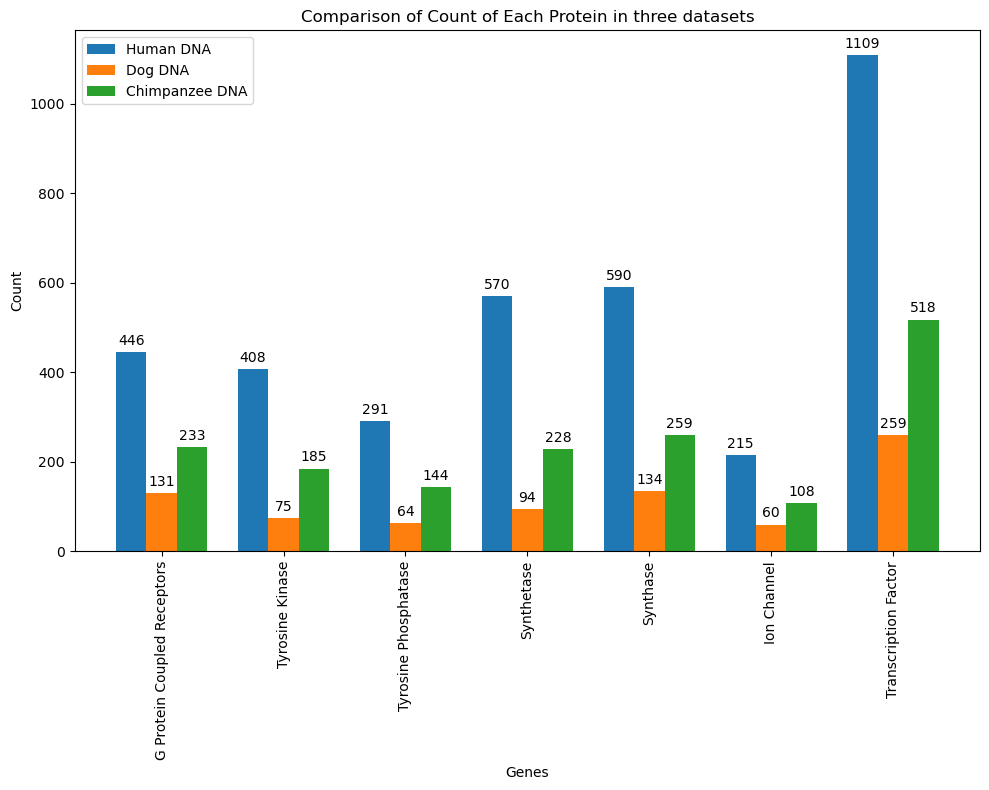

In [21]:
#  A bar plot to display the comparison of count of each class.

labels = class_df.index.astype(str)
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (10, 8))

# Plot bars for each dataset
bar1 = ax.bar(x - width, class_df["Human DNA"], width, label="Human DNA")
bar2 = ax.bar(x, class_df["Dog DNA"], width, label="Dog DNA")
bar3 = ax.bar(x + width, class_df["Chimpanzee DNA"], width, label="Chimpanzee DNA")

# add labels, title, legend
ax.set_xlabel('Genes')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
ax.legend()
plt.title("Comparison of Count of Each Protein in three datasets")

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()

In [22]:
#convert our training data sequences into short overlapping k-mers of length 6.
# Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: kmer_count(x['sequence']), axis=1)
dog_dna['words'] = dog_dna.apply(lambda x: kmer_count(x['sequence']), axis=1)
chimp_dna['words'] = chimp_dna.apply(lambda x: kmer_count(x['sequence']), axis=1)

In [23]:
chimp_dna.sample(2)

,sequence,class,words
1222,ATGGCAAGTCCAGATAGAAGTAAACGGAAGATATTAAAAGCCAAAA...,6,"[atggca, tggcaa, ggcaag, gcaagt, caagtc, aagtc..."
673,ATGAACGGAGAAGCCGACTGCCCCACAGACCTGGAAATGGCCGCCC...,6,"[atgaac, tgaacg, gaacgg, aacgga, acggag, cggag..."


The DNA sequence is changed to lowercase, divided into all possible k-mer words of length 6, and ready for the next step.

Need to convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. We will make a target variable y to hold the class labels.

In [24]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

y_human = human_dna.iloc[:, 1].values # y_human for human_dna

chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])

y_chim = chimp_dna.iloc[:, 1].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])

y_dog = dog_dna.iloc[:, 1].values  # y_dog for dog_dna

Creating the Bag of Words model using CountVectorizer(). This is equivalent to k-mer counting. The n-gram size of 4 was previously determined by testing.

Convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (6, 6))
X_human = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [26]:
print(X_human.shape)
print(X_chimp.shape)
print(X_dog.shape)

(3629, 1025992)
(1675, 1025992)
(817, 1025992)


In [ ]:
# Splitting the human dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human,
                                                    y_human,
                                                    test_size = 0.20,
                                                    random_state=42)

We will create a multinomial naive Bayes classifier. I previously did some parameter tuning and found the ngram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best. Just to keep it simple I won't show that code here.

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

,alpha,0.1
,force_alpha,True
,fit_prior,True
,class_prior,None


In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

Metrics values for Human Testing DNA
accuracy = 0.934 
precision = 0.961 
recall = 0.934 
f1 = 0.941


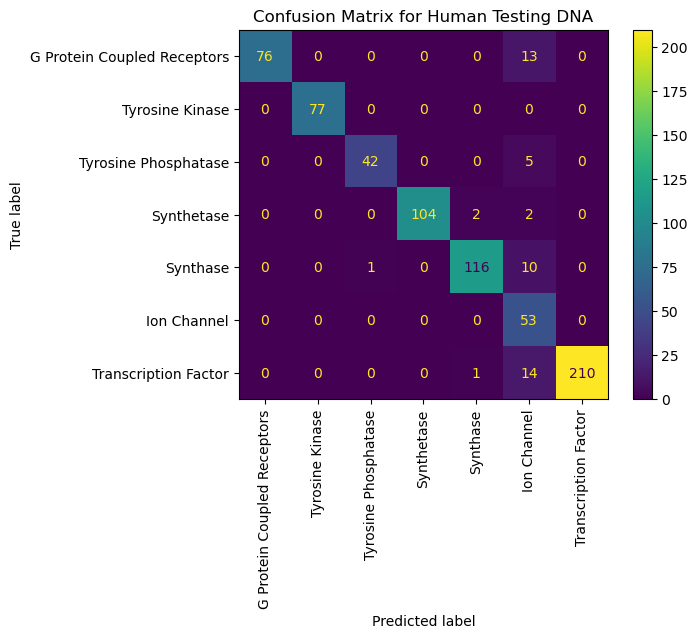

In [31]:
print("Metrics values for Human Testing DNA")
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                display_labels=list(class_mappings.values()),
                                               xticks_rotation='vertical')
plt.title("Confusion Matrix for Human Testing DNA")
plt.show()

Metrics values for Human DNA
accuracy = 0.986 
precision = 0.988 
recall = 0.986 
f1 = 0.987


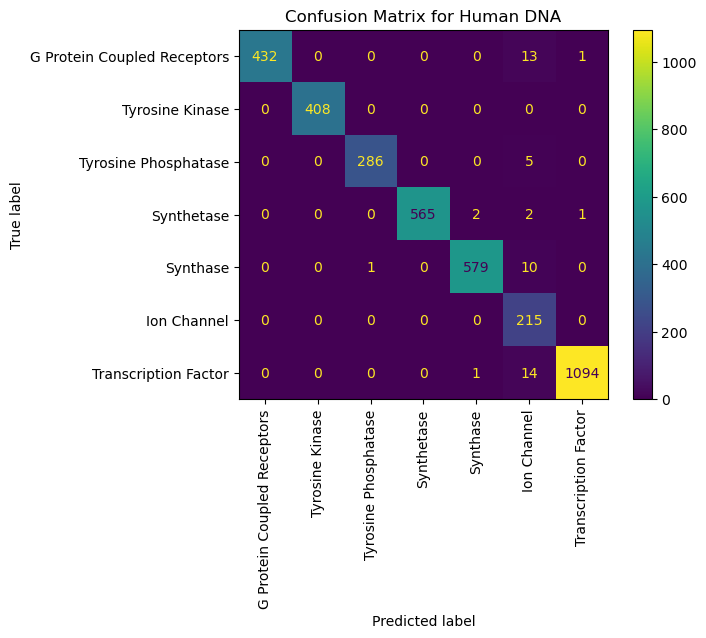

In [32]:
y_pred_human = classifier.predict(X_human)
print("Metrics values for Human DNA")
accuracy, precision, recall, f1 = get_metrics(y_human, y_pred_human)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

ConfusionMatrixDisplay.from_estimator(classifier, X_human, y_human,
                                                display_labels=list(class_mappings.values()),
                                               xticks_rotation='vertical')
plt.title("Confusion Matrix for Human DNA")
plt.show()

Metrics values for Dog DNA
accuracy = 0.967 
precision = 0.972 
recall = 0.967 
f1 = 0.968


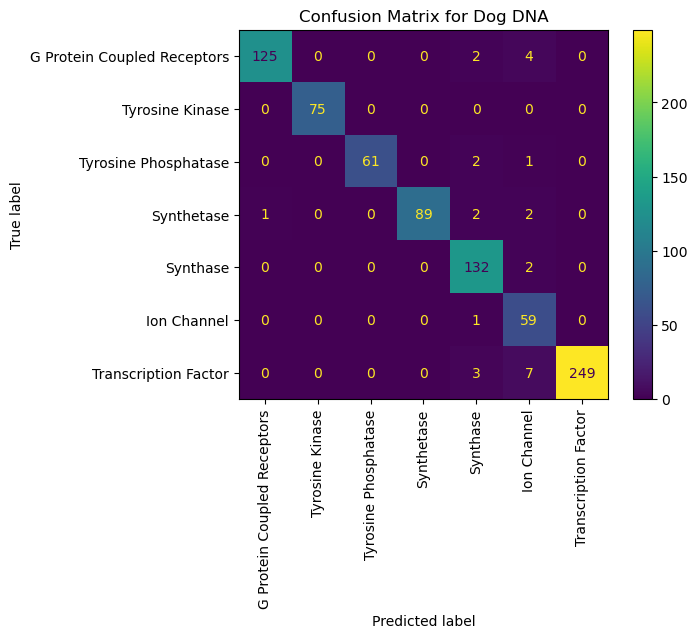

In [33]:
y_pred_dog = classifier.predict(X_dog)
print("Metrics values for Dog DNA")
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

ConfusionMatrixDisplay.from_estimator(classifier, X_dog, y_dog,
                                                display_labels=list(class_mappings.values()),
                                               xticks_rotation='vertical')
plt.title("Confusion Matrix for Dog DNA")
plt.show()

Metrics values for Chimpanzee DNA
accuracy = 0.983 
precision = 0.986 
recall = 0.983 
f1 = 0.983


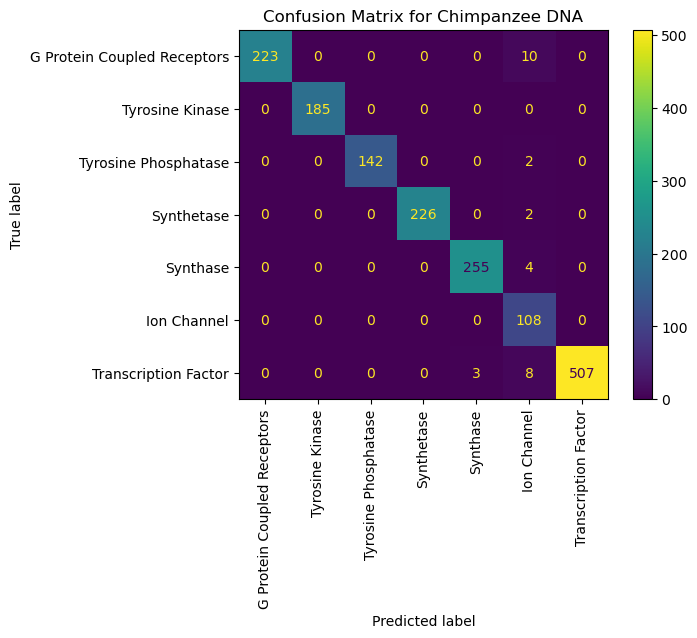

In [34]:
y_pred_chim = classifier.predict(X_chimp)
print("Metrics values for Chimpanzee DNA")
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chim)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

ConfusionMatrixDisplay.from_estimator(classifier, X_chimp, y_chim,
                                                display_labels=list(class_mappings.values()),
                                               xticks_rotation='vertical')
plt.title("Confusion Matrix for Chimpanzee DNA")
plt.show()

| Dataset               | Accuracy | Precision | Recall | F1 Score |
|-----------------------|----------|-----------|--------|----------|
| Human Test DNA        | 0.934    | 0.961     | 0.934  | 0.941    |
| Human Full DNA        | 0.986    | 0.988     | 0.986  | 0.987    |
| Dog DNA               | 0.967    | 0.972     | 0.967  | 0.968    |
| Chimpanzee DNA        | 0.983    | 0.986     | 0.983  | 0.983    |

In [ ]:
# A single function which only takes a classifier and then trains the model on humans dataset and tests it on all datasets.

def complete_prediction(classifier):
  classifier.fit(X_train, y_train)

  y_pred_human = classifier.predict(X_human)
  print("Metrics values for Human DNA")
  accuracy, precision, recall, f1 = get_metrics(y_human, y_pred_human)
  print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

  ConfusionMatrixDisplay.from_estimator(classifier, X_human, y_human,
                                                  display_labels=list(class_mappings.values()),
                                                xticks_rotation='vertical')
  plt.title("Confusion Matrix for Human DNA")
  plt.show()

  y_pred_dog = classifier.predict(X_dog)
  print("Metrics values for Dog DNA")
  accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
  print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

  ConfusionMatrixDisplay.from_estimator(classifier, X_dog, y_dog,
                                                  display_labels=list(class_mappings.values()),
                                                xticks_rotation='vertical')
  plt.title("Confusion Matrix for Dog DNA")
  plt.show()

  y_pred_chim = classifier.predict(X_chimp)
  print("Metrics values for Chimpanzee DNA")
  accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chim)
  print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

  ConfusionMatrixDisplay.from_estimator(classifier, X_chimp, y_chim,
                                                  display_labels=list(class_mappings.values()),
                                                xticks_rotation='vertical')
  plt.title("Confusion Matrix for Chimpanzee DNA")
  plt.show()

Metrics values for Human DNA
accuracy = 0.986 
precision = 0.988 
recall = 0.986 
f1 = 0.987


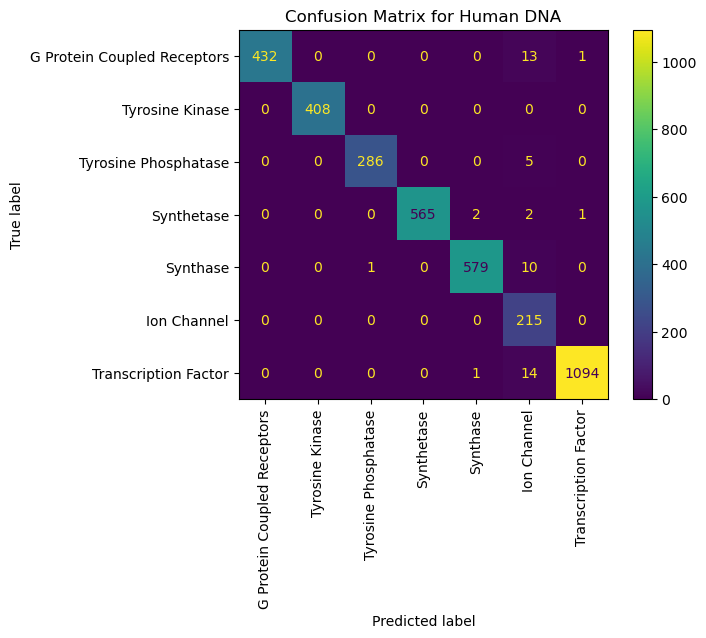

Metrics values for Dog DNA
accuracy = 0.967 
precision = 0.972 
recall = 0.967 
f1 = 0.968


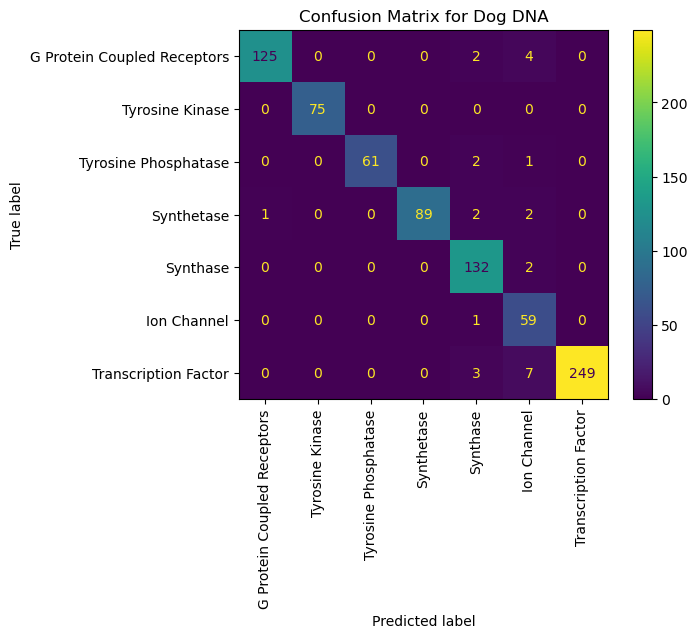

Metrics values for Chimpanzee DNA
accuracy = 0.983 
precision = 0.986 
recall = 0.983 
f1 = 0.983


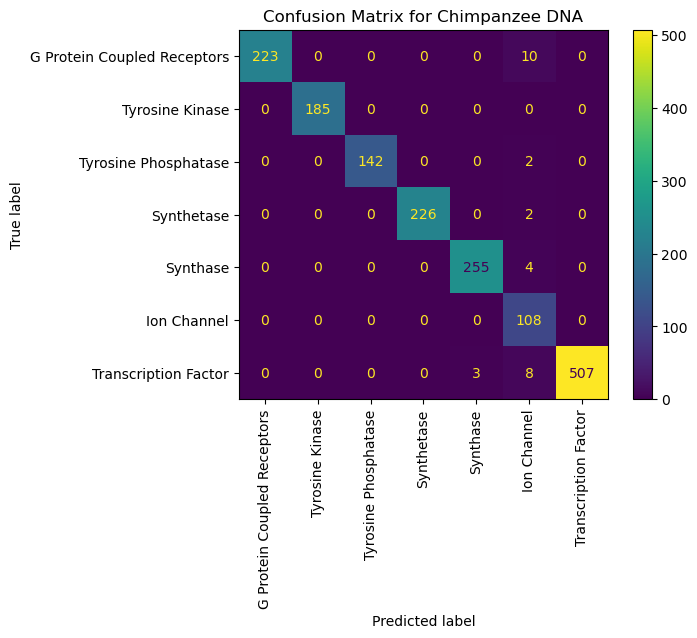

In [36]:
complete_prediction(classifier)

In [37]:
# a function to get top k k-mer words

def top_k_kmer(dataset, k):
  all_words_list = dataset["words"].to_numpy().flatten()
  all_words = []
  for words in all_words_list:
    all_words.extend(words)
  all_words_np = np.array(all_words)
  unique, counts = np.unique(all_words_np, return_counts=True)
  # To find the indices of the top k elements (largest values)
  top_k_indices = np.argpartition(counts, -k)[-k:]
  # The resulting indices are not sorted by value, so sort them if needed
  sorted_top_k_indices = top_k_indices[np.argsort(counts[top_k_indices])][::-1]
  return {
      "kmer" : unique[sorted_top_k_indices].tolist(),
      "count" : counts[sorted_top_k_indices].tolist()
  }

In [38]:
k = 10
human_dna_top_kmer = human_dna.groupby("class").apply(lambda x: top_k_kmer(x, k), include_groups=False)
dog_dna_top_kmer = dog_dna.groupby("class").apply(lambda x: top_k_kmer(x, k), include_groups=False)
chimp_dna_top_kmer = chimp_dna.groupby("class").apply(lambda x: top_k_kmer(x, k), include_groups=False)

In [39]:
print(human_dna_top_kmer)

class
0    {'kmer': ['ctgctg', 'tgctgg', 'cctgct', 'ctgca...
1    {'kmer': ['ctgctg', 'ctggag', 'ctgcag', 'tgctg...
2    {'kmer': ['ctgcag', 'agaaga', 'gaagaa', 'ctggc...
3    {'kmer': ['ctggag', 'gaagaa', 'tggaga', 'agaag...
4    {'kmer': ['ctggag', 'ctgctg', 'cctgga', 'tgctg...
5    {'kmer': ['ctgctg', 'agaaga', 'gaagaa', 'gagga...
6    {'kmer': ['cagcag', 'agcagc', 'agaaga', 'gcagc...
dtype: object


In [40]:
def plot_top_k_kmer(df):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    axes = axes.flatten()  # Flatten to index easily

    # Plotting
    for idx in range(len(class_mappings)):
        data = df.loc[idx]
        kmers = data['kmer']
        counts = data['count']

        sns.barplot(x=counts, y=kmers, hue=kmers, legend=False, ax=axes[idx], )
        axes[idx].set_title(f"Class {idx}: {class_mappings[idx]}")
        axes[idx].set_xlabel("Count")
        axes[idx].set_ylabel("k-mer")

    # Remove unused subplots (if any)
    for i in range(len(class_mappings), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

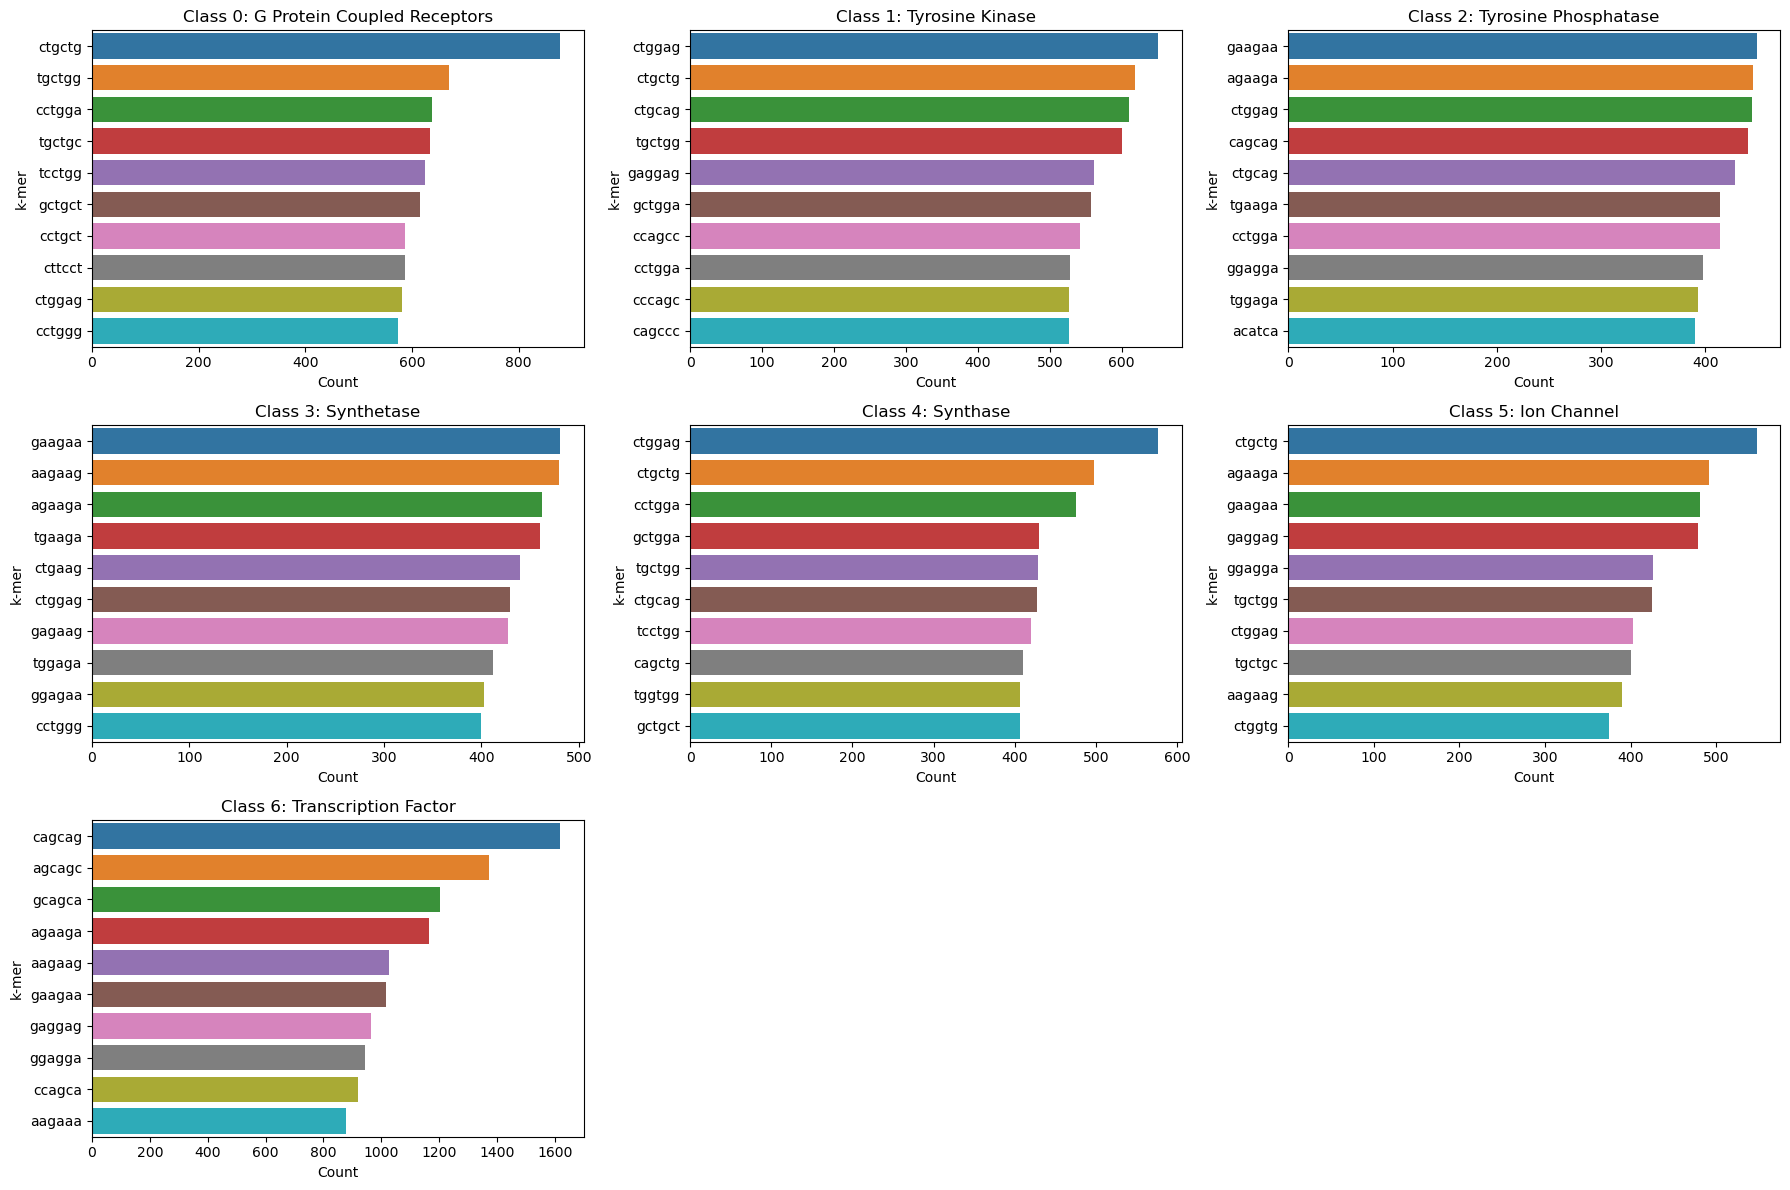

In [41]:
# Chimpanzee data

plot_top_k_kmer(chimp_dna_top_kmer)

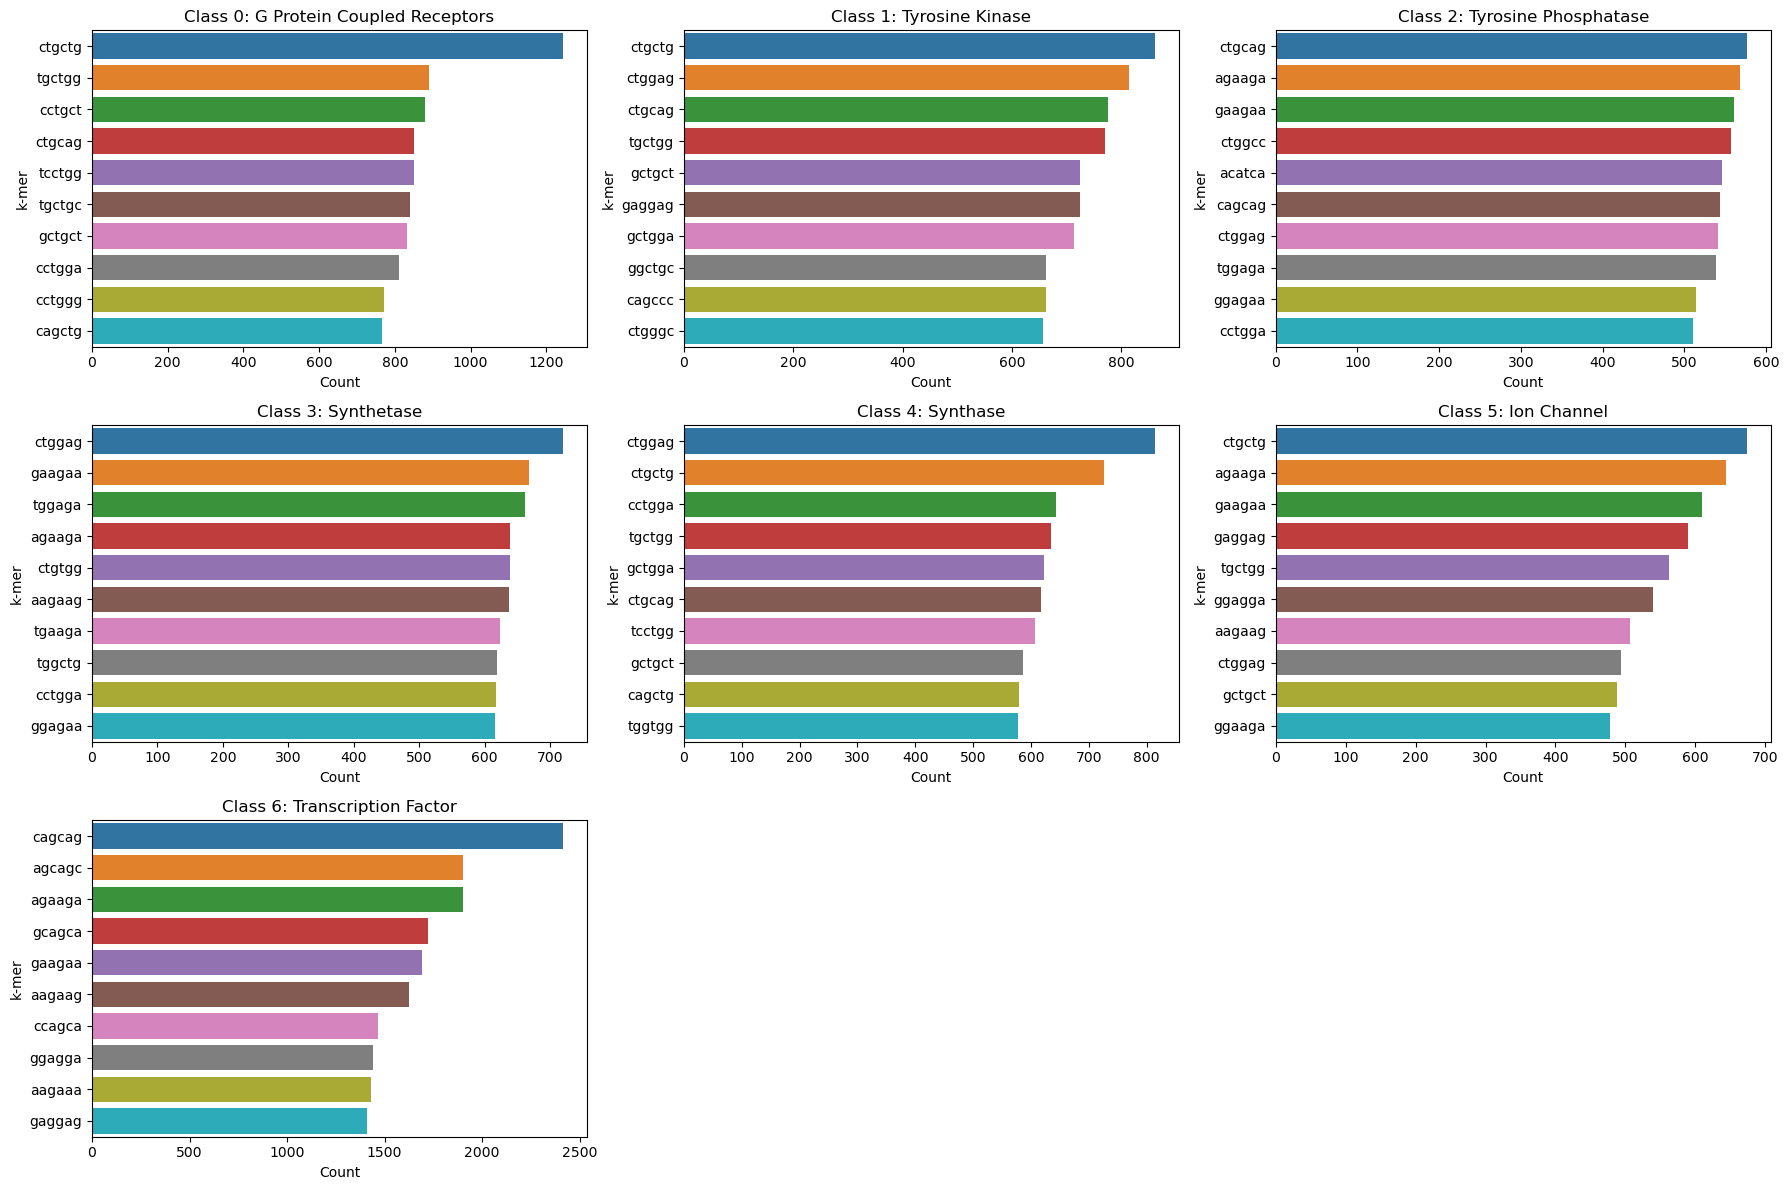

In [42]:
# Human data

plot_top_k_kmer(human_dna_top_kmer)

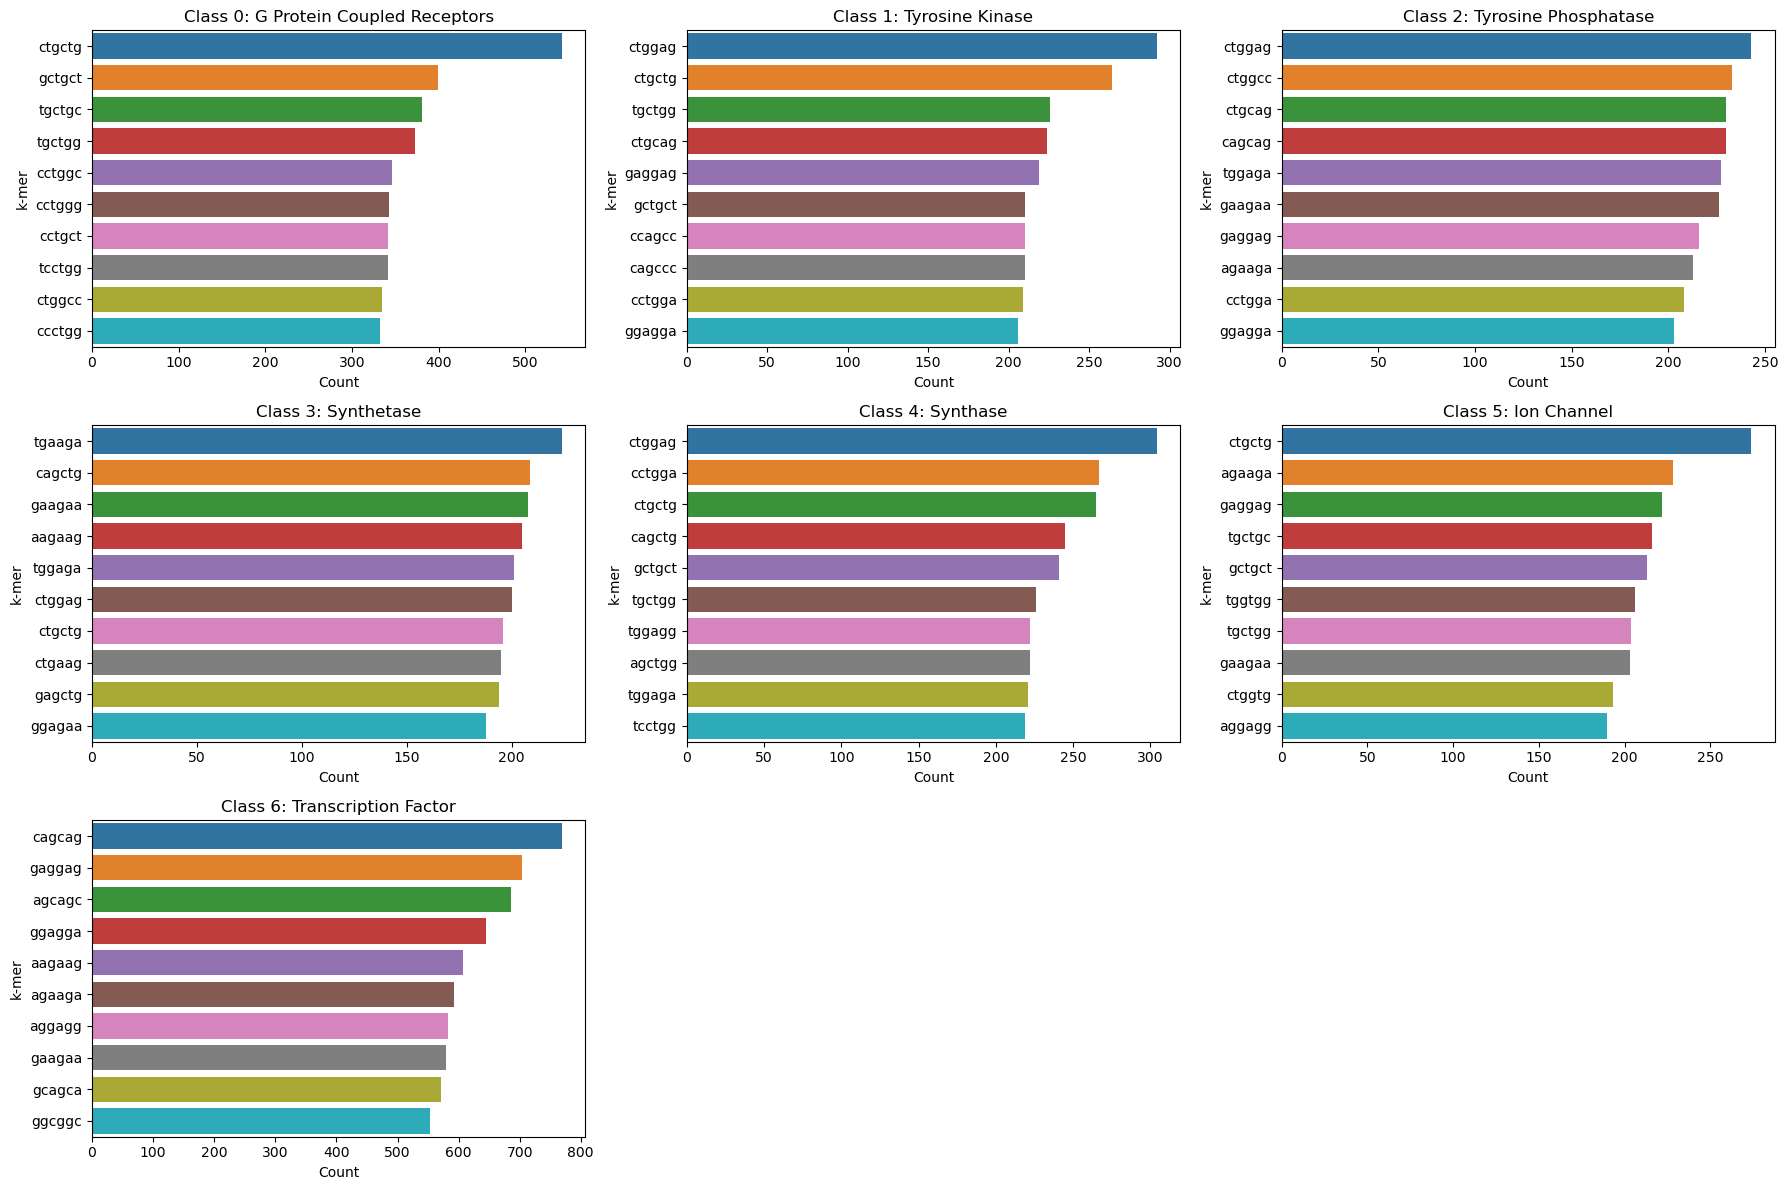

In [43]:
# Dog data

plot_top_k_kmer(dog_dna_top_kmer)

In [44]:
# # Save count vectorize and model
# import joblib

# joblib.dump(classifier, 'Model/naive_bayes_model.pkl')
# joblib.dump(cv, 'Model/count_vectorizer.pkl')